#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [187]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [188]:
X=torch.randint(12, (4,3))
Y=torch.randint(12, (4,3))
X

tensor([[ 3, 11,  1],
        [ 3,  3,  0],
        [ 6,  8, 11],
        [ 8,  6,  0]])

In [189]:
Y

tensor([[ 1,  3,  7],
        [ 1,  3,  0],
        [ 8,  2,  5],
        [ 8, 11,  8]])

In [190]:
# 행 병합
torch.cat([X,Y], dim = 0)

tensor([[ 3, 11,  1],
        [ 3,  3,  0],
        [ 6,  8, 11],
        [ 8,  6,  0],
        [ 1,  3,  7],
        [ 1,  3,  0],
        [ 8,  2,  5],
        [ 8, 11,  8]])

In [191]:
# 열 병합
torch.cat([X,Y], dim = 1)

tensor([[ 3, 11,  1,  1,  3,  7],
        [ 3,  3,  0,  1,  3,  0],
        [ 6,  8, 11,  8,  2,  5],
        [ 8,  6,  0,  8, 11,  8]])

linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [192]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [193]:
import matplotlib
%matplotlib inline


In [194]:
!pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [195]:
import random
import torch
from d2l import torch as d2l

In [196]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [197]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([1.9620, 0.7695]) 
label: tensor([10.2238])


In [198]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [199]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5663, -0.2435],
        [-1.5240,  0.7951],
        [-0.9941, -1.3016],
        [-0.7591,  0.8426],
        [-0.7173,  0.7693],
        [ 0.4702,  1.2323],
        [ 1.6147, -2.4401],
        [-0.3802,  0.8033],
        [-1.1569, -0.0855],
        [ 0.9294,  0.5699],
        [-1.5432,  0.5397],
        [ 0.0958, -0.1977],
        [-0.9686, -0.7035],
        [ 1.0860,  0.1812],
        [-1.7088,  0.8618],
        [ 2.2594, -2.8680],
        [-1.7684, -0.4521],
        [-0.3756,  0.0552],
        [ 1.7972,  1.9024],
        [ 0.8848, -1.6853]]) 
 tensor([[ 7.5706],
        [-0.2733],
        [ 4.4841],
        [ 1.9544],
        [ 2.1847],
        [ 5.0687],
        [13.9893],
        [ 3.1685],
        [ 2.1514],
        [ 7.4342],
        [ 0.0551],
        [ 6.0882],
        [ 3.6464],
        [ 8.4787],
        [-0.9235],
        [16.5878],
        [ 0.8563],
        [ 4.2938],
        [ 8.0374],
        [10.6940]])


In [200]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([2.3], requires_grad= True)#원하는 실수를 넣어주세요

In [201]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [202]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [203]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
      for param in params:
        param -= lr / batch_size * param.grad
        param.grad.zero_()

In [204]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.024117
epoch 2, loss 0.000104
epoch 3, loss 0.000051


In [205]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([0.0004, 0.0002], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0002], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [206]:
import matplotlib.pyplot as plt 

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([2.3], requires_grad= True)#원하는 실수를 넣어주세요 

lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

w0_list = []
w1_list = []
loss_list = []

for epoch in range(num_epochs):
    
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        w0_list.append(w.tolist()[0])
        w1_list.append(w.tolist()[1])
        loss_list.append(float(train_l.mean()))



epoch 1, loss 0.024294
epoch 2, loss 0.000105
epoch 3, loss 0.000051
epoch 4, loss 0.000051
epoch 5, loss 0.000051
epoch 6, loss 0.000051
epoch 7, loss 0.000051
epoch 8, loss 0.000051
epoch 9, loss 0.000051
epoch 10, loss 0.000051


In [207]:
w0_list

[[2.8725316524505615],
 [2.9945030212402344],
 [2.999539375305176],
 [2.9998795986175537],
 [2.99985671043396],
 [2.9999194145202637],
 [3.0002307891845703],
 [2.9999783039093018],
 [2.999631881713867],
 [2.999559164047241]]

In [208]:
w1_list

[[-1.4144750833511353],
 [-1.4957664012908936],
 [-1.4997793436050415],
 [-1.500686526298523],
 [-1.500492811203003],
 [-1.5002996921539307],
 [-1.5005724430084229],
 [-1.5007903575897217],
 [-1.5009087324142456],
 [-1.5002968311309814]]

In [209]:
loss_list

[0.024293996393680573,
 0.00010469878907315433,
 5.1171307859476656e-05,
 5.0756523705786094e-05,
 5.073478678241372e-05,
 5.076524394098669e-05,
 5.083289943286218e-05,
 5.078907634015195e-05,
 5.085060547571629e-05,
 5.0769405788742006e-05]

In [210]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.6 requires matplotlib==3.5.1, but you have matplotlib 3.1.3 which is incompatible.


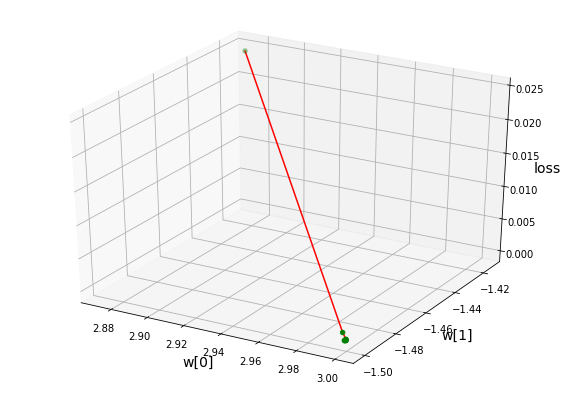

In [211]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter(w0_list, w1_list, loss_list, color = 'green')
ax.plot(w0_list, w1_list, loss_list, color = 'red')
ax.set_zlabel('loss', size = 14)
ax.set_ylabel('w[1]', size = 14)
ax.set_xlabel('w[0]', size = 14)
plt.show()

concise implementation of linear regression 
- api 사용해보기

In [212]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [213]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [214]:
next(iter(data_iter))

[tensor([[ 0.3162, -1.2060],
         [ 0.4830,  0.8507],
         [ 0.3673,  0.9387],
         [ 0.7609,  0.7194],
         [ 0.8521, -0.0961],
         [-1.6904,  0.1686],
         [-0.5895, -0.5820],
         [ 1.0385, -0.5279],
         [ 0.4548,  0.2433],
         [-0.6356, -1.0578],
         [-1.0467, -0.3674],
         [-0.4215,  1.3308],
         [-0.8672, -0.6528],
         [ 0.8182, -1.1963],
         [-0.8324, -0.0451],
         [-0.0683, -0.8681],
         [-1.7576, -0.7868],
         [ 0.3964,  0.4151],
         [-0.9341, -1.5279],
         [ 1.3735,  0.6151]]), tensor([[8.2651],
         [5.6745],
         [5.1978],
         [6.6986],
         [8.1967],
         [0.1675],
         [4.6107],
         [9.3905],
         [6.5058],
         [5.1864],
         [2.9199],
         [2.2616],
         [3.8904],
         [9.7559],
         [3.0654],
         [6.5960],
         [1.4014],
         [6.0672],
         [4.9995],
         [8.7062]])]

In [215]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [216]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [217]:
loss = nn.MSELoss()

In [218]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [219]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000240
epoch 2, loss 0.000099
epoch 3, loss 0.000099


In [220]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0002,  0.0002])
error in estimating b: tensor([-0.0003])
